# CBOE VXFXI  Index

In this notebook, we'll take a look at the CBOE VXFXI Index dataset, available on the [Quantopian Store](https://www.quantopian.com/store). This dataset spans 16 Mar 2011 through the current day. This data has a daily frequency. CBOE VXFI is the China ETF Volatility Index which reflects the implied volatility of the FXI ETF

## Notebook Contents

There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href='#interactive'><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <a href='#pipeline'><strong>Pipeline overview</strong></a>: Data is made available through pipeline which is available on both the Research & Backtesting environment. Recommended for custom factor development and moving back & forth between research/backtesting.


### Limits
One key caveat: we limit the number of results returned from any given expression to 10,000 to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

With preamble in place, let's get started:

<a id='interactive'></a>
#Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to reduce your dataset in size, convert it over to Pandas and then to use Pandas for further computation, manipulation and visualization.

Helpful links:
* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).


Once you've limited the size of your Blaze object, you can convert it to a Pandas DataFrames using:
> `from odo import odo`  
> `odo(expr, pandas.DataFrame)`


###To see how this data can be used in your algorithm, search for the `Pipeline Overview` section of this notebook or head straight to <a href='#pipeline'>Pipeline Overview</a>

In [1]:
# For use in Quantopian Research, exploring interactively
from quantopian.interactive.data.quandl import cboe_vxfxi as dataset

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd

In [2]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset.dshape

dshape("""var * {
  open_: float64,
  high: float64,
  low: float64,
  close: float64,
  asof_date: datetime,
  timestamp: datetime
  }""")

In [3]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
dataset.count()

1307

In [4]:
# Let's see what the data looks like. We'll grab the first three rows.
dataset[:3]

,open_,high,low,close,asof_date,timestamp
0,36.01,36.04,35.40,35.89,2016-02-23,2016-02-24 12:01:15.351703
1,37.98,38.83,37.26,37.49,2016-02-24,2016-02-25 12:01:06.402868
2,38.84,39.42,38.84,38.90,2016-02-25,2016-02-26 12:00:59.519176


Let's go over the columns:
- **open**: open price for vxfxi
- **high**: daily high for vxfxi
- **low**: daily low for vxfxi
- **close**: close price for vxfxi
- **asof_date**: the timeframe to which this data applies
- **timestamp**: this is our timestamp on when we registered the data.

We've done much of the data processing for you. Fields like `timestamp` are standardized across all our Store Datasets, so the datasets are easy to combine.

We can select columns and rows with ease. Below, we'll do a simple plot.

In [5]:
# Plotting this DataFrame
df = odo(dataset, pd.DataFrame)
df.head(5)

,open_,high,low,close,asof_date,timestamp
0,36.01,36.04,35.40,35.89,2016-02-23,2016-02-24 12:01:15.351703
1,37.98,38.83,37.26,37.49,2016-02-24,2016-02-25 12:01:06.402868
2,38.84,39.42,38.84,38.90,2016-02-25,2016-02-26 12:00:59.519176
3,37.94,38.10,37.05,37.35,2016-02-26,2016-02-29 12:00:59.357731
4,38.68,38.68,37.27,37.58,2016-02-29,2016-03-01 12:02:36.764752


In [6]:
# So we can plot it, we'll set the index as the `asof_date`
df['asof_date'] = pd.to_datetime(df['asof_date'])
df = df.set_index(['asof_date'])
df.head(5)

,open_,high,low,close,timestamp
asof_date,,,,,
2016-02-23,36.01,36.04,35.40,35.89,2016-02-24 12:01:15.351703
2016-02-24,37.98,38.83,37.26,37.49,2016-02-25 12:01:06.402868
2016-02-25,38.84,39.42,38.84,38.90,2016-02-26 12:00:59.519176
2016-02-26,37.94,38.10,37.05,37.35,2016-02-29 12:00:59.357731
2016-02-29,38.68,38.68,37.27,37.58,2016-03-01 12:02:36.764752


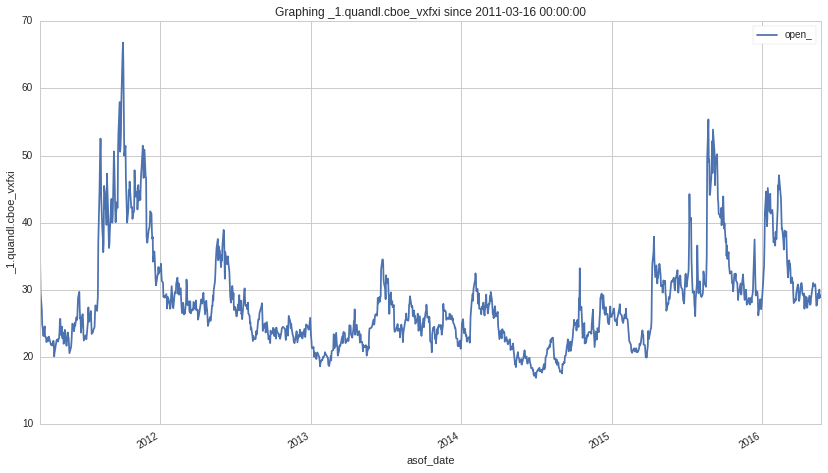

In [7]:
import matplotlib.pyplot as plt
df['open_'].plot(label=str(dataset))
plt.ylabel(str(dataset))
plt.legend()
plt.title("Graphing %s since %s" % (str(dataset), min(df.index)))

<a id='pipeline'></a>

#Pipeline Overview

### Accessing the data in your algorithms & research
The only method for accessing partner data within algorithms running on Quantopian is via the pipeline API. Different data sets work differently but in the case of this data, you can add this data to your pipeline as follows:

Import the data set here
> `from quantopian.pipeline.data.quandl import cboe_vxfxi`

Then in intialize() you could do something simple like adding the raw value of one of the fields to your pipeline:
> `pipe.add(cboe_vxfxi.open_.latest, 'open')`

Pipeline usage is very similar between the backtester and Research so let's go over how to import this data through pipeline and view its outputs.

In [8]:
# Import necessary Pipeline modules
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import AverageDollarVolume

In [9]:
# Import the datasets available
from quantopian.pipeline.data.quandl import cboe_vxfxi

Now that we've imported the data, let's take a look at which fields are available for each dataset.

You'll find the dataset, the available fields, and the datatypes for each of those fields.

In [10]:
print "Here are the list of available fields per dataset:"
print "---------------------------------------------------\n"

def _print_fields(dataset):
    print "Dataset: %s\n" % dataset.__name__
    print "Fields:"
    for field in list(dataset.columns):
        print "%s - %s" % (field.name, field.dtype)
    print "\n"

_print_fields(cboe_vxfxi)


print "---------------------------------------------------\n"

Here are the list of available fields per dataset:
---------------------------------------------------

Dataset: cboe_vxfxi

Fields:
low - float64
high - float64
close - float64
open_ - float64


---------------------------------------------------



Now that we know what fields we have access to, let's see what this data looks like when we run it through Pipeline.


This is constructed the same way as you would in the backtester. For more information on using Pipeline in Research view this thread:
https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

In [11]:
pipe = Pipeline()
       
pipe.add(cboe_vxfxi.open_.latest, 'open_vxfxi')

In [13]:
# Setting some basic liquidity strings (just for good habit)
dollar_volume = AverageDollarVolume(window_length=20)
top_1000_most_liquid = dollar_volume.rank(ascending=False) < 1000

pipe.set_screen(top_1000_most_liquid & cboe_vxfxi.open_.latest.notnan())

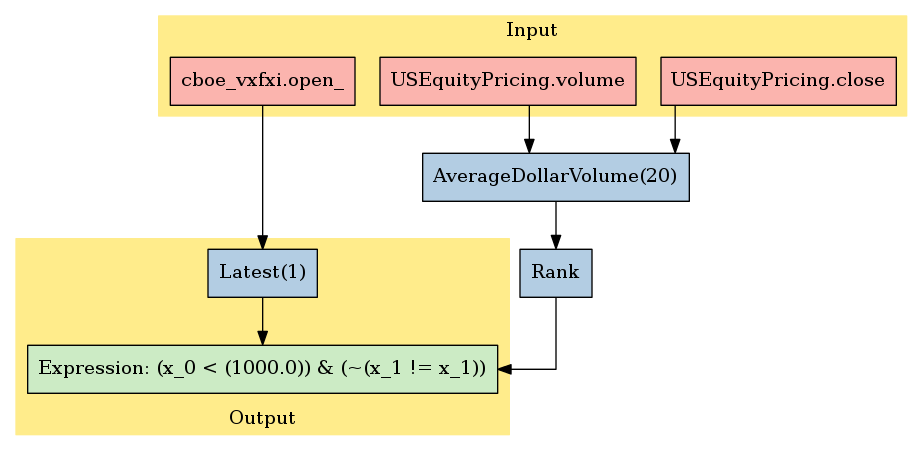

In [14]:
# The show_graph() method of pipeline objects produces a graph to show how it is being calculated.
pipe.show_graph(format='png')

In [15]:
# run_pipeline will show the output of your pipeline
pipe_output = run_pipeline(pipe, start_date='2013-11-01', end_date='2013-11-25')
pipe_output

open_vxfxi
2013-11-01 00:00:00+00:00 Equity(21 [AAME])              22.7
                          Equity(25 [AA_PR])             22.7
                          Equity(117 [AEY])              22.7
                          Equity(225 [AHPI])             22.7
                          Equity(312 [ALOT])             22.7
                          Equity(392 [AMS])              22.7
                          Equity(468 [API])              22.7
                          Equity(548 [ASBI])             22.7
                          Equity(717 [BAMM])             22.7
                          Equity(790 [BDL])              22.7
                          Equity(880 [BIO_B])            22.7
                          Equity(925 [BKSC])             22.7
                          Equity(1088 [BRID])            22.7
                          Equity(1095 [BRN])             22.7
                          Equity(1157 [BTUI])            22.7
                          Equity(1190 [BWIN_A])          22.7
                          Equity(1193 [BWL_A])           22.7
                          Equity(1323 [CAW])             22.7
                          Equity(1653 [MOC])             22.7
                          Equity(1668 [CMS_PRB])         22.7
                          Equity(1988 [CUO])             22.7
                          Equity(2078 [DAIO])            22.7
                          Equity(2103 [ESCR])            22.7
                          Equity(2124 [DD_PRA])          22.7
                          Equity(2209 [DGSE])            22.7
                          Equity(2292 [DRCO])            22.7
                          Equity(2344 [DRAM])            22.7
                          Equity(2382 [DXR])             22.7
                          Equity(2389 [COBR])            22.7
                          Equity(2391 [DYNT])            22.7
...                                                       ...
2013-11-25 00:00:00+00:00 Equity(45179 [ERW])            27.0
                          Equity(45195 [LGL_WS])         27.0
                          Equity(45203 [NASH])           27.0
                          Equity(45222 [QPAC_U])         27.0
                          Equity(45240 [INTL_L])         27.0
                          Equity(45270 [TIPT])           27.0
                          Equity(45288 [EMHD])           27.0
                          Equity(45301 [TRC_WS])         27.0
                          Equity(45390 [CPXX])           27.0
                          Equity(45412 [EAGL])           27.0
                          Equity(45414 [EAGL_W])         27.0
                          Equity(45420 [ROIQ_U])         27.0
                          Equity(45432 [SPCB])           27.0
                          Equity(45510 [MLPC])           27.0
                          Equity(45524 [NVEE])           27.0
                          Equity(45525 [NVEE_W])         27.0
                          Equity(45527 [JASN])           27.0
                          Equity(45536 [JASN_W])         27.0
                          Equity(45562 [ESBA])           27.0
                          Equity(45563 [OGCP])           27.0
                          Equity(45564 [FISK])           27.0
                          Equity(45646 [CHNA])           27.0
                          Equity(45678 [SLQD])           27.0
                          Equity(45680 [ADXS_W])         27.0
                          Equity(45717 [FTGC])           27.0
                          Equity(45768 [KODK_WS])        27.0
                          Equity(45792 [FTSD])           27.0
                          Equity(45824 [ROIQ_W])         27.0
                          Equity(45854 [PGAL])           27.0
                          Equity(45895 [EMSH])           27.0

[16983 rows x 1 columns]

Here, you'll notice that each security is mapped to the corresponding value, so you could grab any security to get what you need.

Taking what we've seen from above, let's see how we'd move that into the backtester.

In [17]:
# This section is only importable in the backtester
from quantopian.algorithm import attach_pipeline, pipeline_output

# General pipeline imports
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import AverageDollarVolume

# For use in your algorithms via the pipeline API
from quantopian.pipeline.data.quandl import cboe_vxfxi

def make_pipeline():
    # Create our pipeline
    pipe = Pipeline()
    
    # Screen out penny stocks and low liquidity securities.
    dollar_volume = AverageDollarVolume(window_length=20)
    is_liquid = dollar_volume.rank(ascending=False) < 1000
    
    # Create the mask that we will use for our percentile methods.
    base_universe = (is_liquid)

    # Add the datasets available
    pipe.add(cboe_vxfxi.open_.latest, 'vxfxi_open')

    # Set our pipeline screens
    pipe.set_screen(is_liquid)
    return pipe

def initialize(context):
    attach_pipeline(make_pipeline(), "pipeline")
    
def before_trading_start(context, data):
    results = pipeline_output('pipeline')

Now you can take that and begin to use it as a building block for your algorithms, for more examples on how to do that you can visit our <a href='https://www.quantopian.com/posts/pipeline-factor-library-for-data'>data pipeline factor library</a>